# Flight Fare Prediction

# Imorting Libraries

In [1]:
import pandas as pd
pd.set_option('display.max_columns',None)
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings 
warnings.filterwarnings('ignore')

## Reading Dataset

In [2]:
df=pd.read_excel('Python_Flight_Fare_d.xlsx')

In [3]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
df.shape

(10683, 11)

### Checking for Null And Droping Null

In [5]:
df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [6]:
df=df.dropna()
df.shape

(10682, 11)

### Getting Information Of Dataset

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 1001.4+ KB


## Preprocessing Columns

### Extracting Day And Month From Journey Date

In [8]:
df['Day_of_Journey']=pd.to_datetime(df['Date_of_Journey'],format='%d/%m/%Y').dt.day

In [9]:
df['Month_of_Journey']=pd.to_datetime(df['Date_of_Journey'],format='%d/%m/%Y').dt.month

In [10]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


#### Droping Date of journey Column

In [11]:
df.drop('Date_of_Journey',axis=1,inplace=True)
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


### Extracting Hours and Minutes from Departure Time

In [12]:
df['Departure_Hour']=pd.to_datetime(df['Dep_Time']).dt.hour

In [13]:
df['Departure_Minute']=pd.to_datetime(df['Dep_Time']).dt.minute

In [14]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Departure_Hour,Departure_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


#### Droping Departure time 

In [15]:
df.drop('Dep_Time',axis=1,inplace=True)
df.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Departure_Hour,Departure_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


### Extracting Hours and Minutes from Arrival Time

In [16]:
df['Arrival_Hour']=pd.to_datetime(df['Arrival_Time']).dt.hour

In [17]:
df['Arrival_Minute']=pd.to_datetime(df['Arrival_Time']).dt.minute

In [18]:
df.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Departure_Hour,Departure_Minute,Arrival_Hour,Arrival_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


#### Droping Arrival time 

In [19]:
df.drop('Arrival_Time',axis=1,inplace=True)
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Departure_Hour,Departure_Minute,Arrival_Hour,Arrival_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


## Splitting duration column

In [20]:
duration=list(df['Duration'])
duration

['2h 50m',
 '7h 25m',
 '19h',
 '5h 25m',
 '4h 45m',
 '2h 25m',
 '15h 30m',
 '21h 5m',
 '25h 30m',
 '7h 50m',
 '13h 15m',
 '2h 35m',
 '2h 15m',
 '12h 10m',
 '2h 35m',
 '26h 35m',
 '4h 30m',
 '22h 35m',
 '23h',
 '20h 35m',
 '5h 10m',
 '15h 20m',
 '2h 50m',
 '2h 55m',
 '13h 20m',
 '15h 10m',
 '5h 45m',
 '5h 55m',
 '2h 50m',
 '2h 15m',
 '2h 15m',
 '13h 25m',
 '2h 50m',
 '22h',
 '5h 30m',
 '10h 25m',
 '5h 15m',
 '2h 30m',
 '6h 15m',
 '11h 55m',
 '11h 5m',
 '8h 30m',
 '22h 5m',
 '2h 45m',
 '12h',
 '2h 50m',
 '2h 50m',
 '2h 15m',
 '16h 5m',
 '19h 55m',
 '3h 15m',
 '25h 20m',
 '2h 50m',
 '3h',
 '2h 50m',
 '16h 15m',
 '15h 5m',
 '2h 15m',
 '6h 30m',
 '25h 5m',
 '12h 25m',
 '27h 20m',
 '10h 15m',
 '10h 30m',
 '2h 15m',
 '10h 25m',
 '2h 50m',
 '1h 30m',
 '13h 20m',
 '2h 15m',
 '1h 25m',
 '26h 30m',
 '7h 20m',
 '13h 30m',
 '5h',
 '2h 45m',
 '2h 50m',
 '1h 30m',
 '19h 5m',
 '2h 15m',
 '14h 50m',
 '2h 40m',
 '22h 10m',
 '9h 35m',
 '10h',
 '21h 20m',
 '5h 25m',
 '18h 45m',
 '12h 20m',
 '18h',
 '9h 15

In [21]:
for i in range(len(duration)):
    if len(duration[i].split())!=2:
        if 'h' in duration[i]:
            duration[i]=duration[i].strip()+' 0m'
        else:
            duration[i]='0h '+duration[i]

In [22]:
duration

['2h 50m',
 '7h 25m',
 '19h 0m',
 '5h 25m',
 '4h 45m',
 '2h 25m',
 '15h 30m',
 '21h 5m',
 '25h 30m',
 '7h 50m',
 '13h 15m',
 '2h 35m',
 '2h 15m',
 '12h 10m',
 '2h 35m',
 '26h 35m',
 '4h 30m',
 '22h 35m',
 '23h 0m',
 '20h 35m',
 '5h 10m',
 '15h 20m',
 '2h 50m',
 '2h 55m',
 '13h 20m',
 '15h 10m',
 '5h 45m',
 '5h 55m',
 '2h 50m',
 '2h 15m',
 '2h 15m',
 '13h 25m',
 '2h 50m',
 '22h 0m',
 '5h 30m',
 '10h 25m',
 '5h 15m',
 '2h 30m',
 '6h 15m',
 '11h 55m',
 '11h 5m',
 '8h 30m',
 '22h 5m',
 '2h 45m',
 '12h 0m',
 '2h 50m',
 '2h 50m',
 '2h 15m',
 '16h 5m',
 '19h 55m',
 '3h 15m',
 '25h 20m',
 '2h 50m',
 '3h 0m',
 '2h 50m',
 '16h 15m',
 '15h 5m',
 '2h 15m',
 '6h 30m',
 '25h 5m',
 '12h 25m',
 '27h 20m',
 '10h 15m',
 '10h 30m',
 '2h 15m',
 '10h 25m',
 '2h 50m',
 '1h 30m',
 '13h 20m',
 '2h 15m',
 '1h 25m',
 '26h 30m',
 '7h 20m',
 '13h 30m',
 '5h 0m',
 '2h 45m',
 '2h 50m',
 '1h 30m',
 '19h 5m',
 '2h 15m',
 '14h 50m',
 '2h 40m',
 '22h 10m',
 '9h 35m',
 '10h 0m',
 '21h 20m',
 '5h 25m',
 '18h 45m',
 '12h 

In [23]:
duration=pd.DataFrame(duration)
duration

,0
0,2h 50m
1,7h 25m
2,19h 0m
3,5h 25m
4,4h 45m
...,...
10677,2h 30m
10678,2h 35m
10679,3h 0m
10680,2h 40m


In [24]:
dura=duration[0].str.split(expand=True)
dura

,0,1
0,2h,50m
1,7h,25m
2,19h,0m
3,5h,25m
4,4h,45m
...,...,...
10677,2h,30m
10678,2h,35m
10679,3h,0m
10680,2h,40m


In [25]:
dura[0]=dura[0].replace('h','',regex=True)
dura

,0,1
0,2,50m
1,7,25m
2,19,0m
3,5,25m
4,4,45m
...,...,...
10677,2,30m
10678,2,35m
10679,3,0m
10680,2,40m


In [26]:
dura[1]=dura[1].replace('m','',regex=True)
dura

,0,1
0,2,50
1,7,25
2,19,0
3,5,25
4,4,45
...,...,...
10677,2,30
10678,2,35
10679,3,0
10680,2,40


In [27]:
dura.columns=['Duration_Hours','Duration_Minutes']
dura

,Duration_Hours,Duration_Minutes
0,2,50
1,7,25
2,19,0
3,5,25
4,4,45
...,...,...
10677,2,30
10678,2,35
10679,3,0
10680,2,40


### Bar Chart of Average Price of Each Airline

<AxesSubplot:xlabel='Airline'>

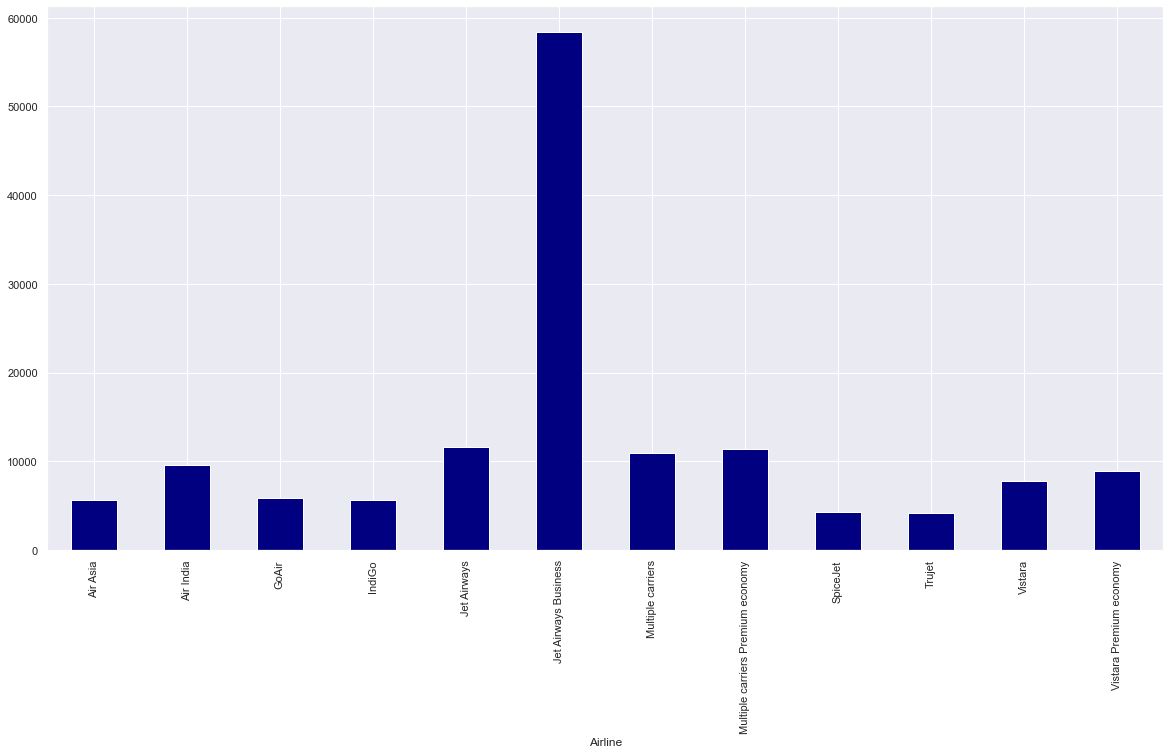

In [28]:
df.groupby(['Airline'])['Price'].mean().plot(kind='bar',figsize=(20,10),color="navy")

#### Barchart Shows That Jet Airways Bussiness Has High Price Than Others

## Boxplot For Price And Airline 

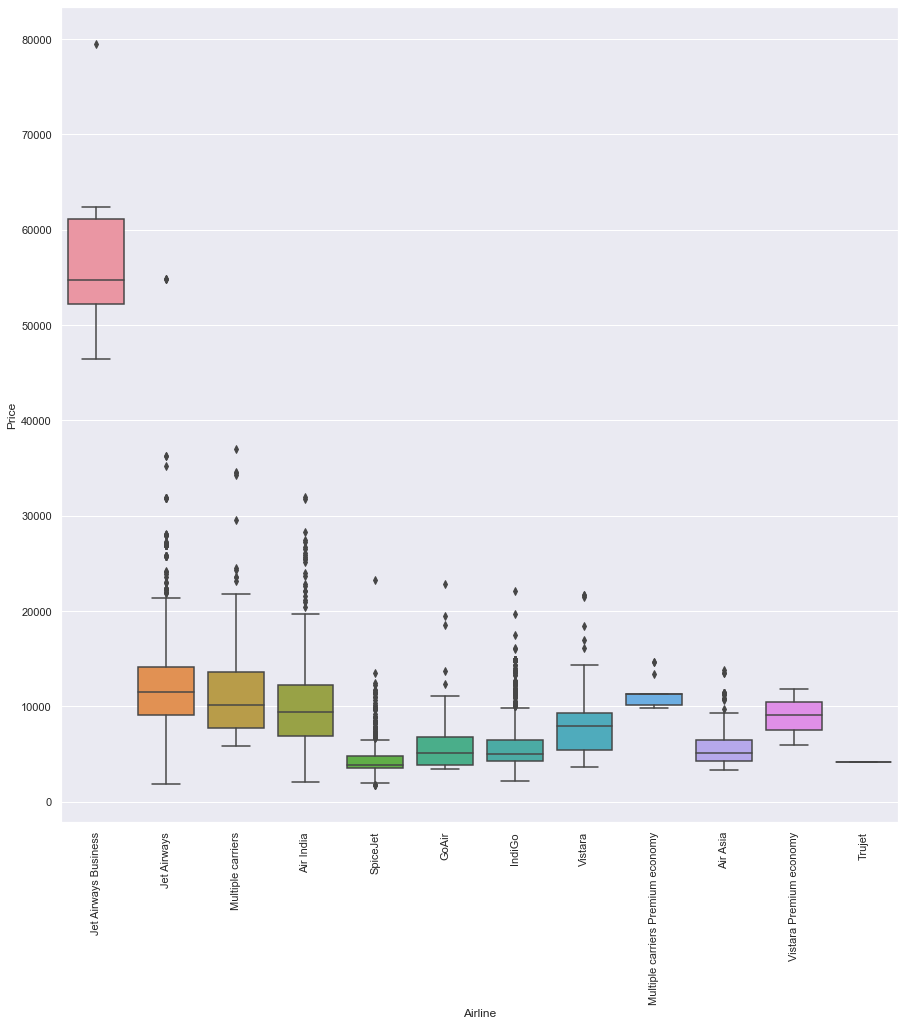

In [29]:
plt.figure(figsize=(15,15))
sns.boxplot(data=df.sort_values('Price',ascending=False),x='Airline',y='Price')
plt.xticks(rotation=90);

#### Graph Shows That Jet Airways Has Highest range Of Price

In [30]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Departure_Hour,Departure_Minute,Arrival_Hour,Arrival_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [31]:
df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

## Displaying Effect of Stops,Destinations & Sources on Price

<AxesSubplot:xlabel='Total_Stops'>

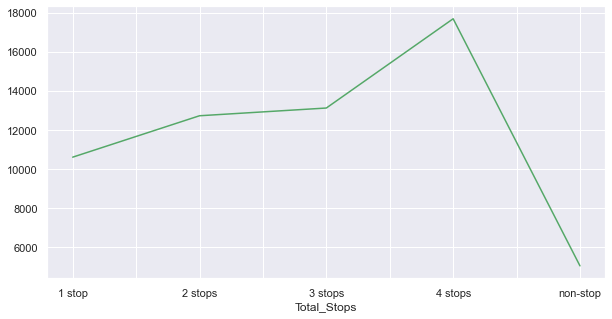

In [32]:
df.groupby(['Total_Stops'])['Price'].mean().plot(figsize=(10,5),color='g')

### Highest Price in 4 Stop and Lowest in Non Stop

<AxesSubplot:xlabel='Destination'>

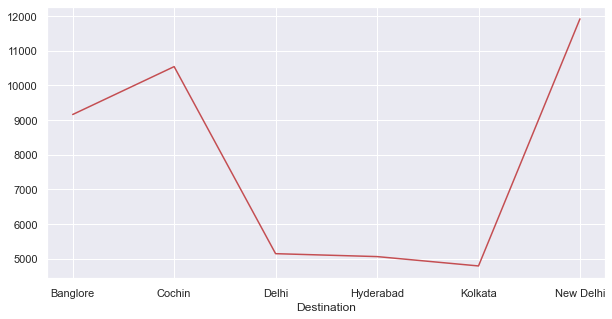

In [33]:
df.groupby(['Destination'])['Price'].mean().plot(figsize=(10,5),color='r')

### Highest price When Destination Delhi

<AxesSubplot:xlabel='Source'>

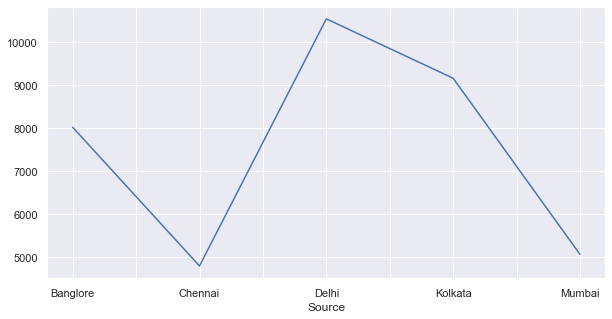

In [34]:
df.groupby(['Source'])['Price'].mean().plot(figsize=(10,5))

### Highest Price When Source is Delhi

## Encoding The Data

In [35]:
df['Total_Stops']=df['Total_Stops'].replace({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4})
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Departure_Hour,Departure_Minute,Arrival_Hour,Arrival_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,0,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1,No info,13302,1,3,16,50,21,35


In [36]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [37]:
df[['Airline','Source','Destination']]=df[['Airline','Source','Destination']].apply(le.fit_transform)

In [38]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Departure_Hour,Departure_Minute,Arrival_Hour,Arrival_Minute
0,3,0,5,BLR → DEL,2h 50m,0,No info,3897,24,3,22,20,1,10
1,1,3,0,CCU → IXR → BBI → BLR,7h 25m,2,No info,7662,1,5,5,50,13,15
2,4,2,1,DEL → LKO → BOM → COK,19h,2,No info,13882,9,6,9,25,4,25
3,3,3,0,CCU → NAG → BLR,5h 25m,1,No info,6218,12,5,18,5,23,30
4,3,0,5,BLR → NAG → DEL,4h 45m,1,No info,13302,1,3,16,50,21,35


### Deleting Unwanted Columns

In [39]:
df=df.drop(['Route','Duration','Additional_Info'],axis=1)

### Concatinating Duration with Data

In [40]:
df=pd.concat([df,dura],axis=1)

In [41]:
df.head()

,Airline,Source,Destination,Total_Stops,Price,Day_of_Journey,Month_of_Journey,Departure_Hour,Departure_Minute,Arrival_Hour,Arrival_Minute,Duration_Hours,Duration_Minutes
0,3.0,0.0,5.0,0.0,3897.0,24.0,3.0,22.0,20.0,1.0,10.0,2,50
1,1.0,3.0,0.0,2.0,7662.0,1.0,5.0,5.0,50.0,13.0,15.0,7,25
2,4.0,2.0,1.0,2.0,13882.0,9.0,6.0,9.0,25.0,4.0,25.0,19,0
3,3.0,3.0,0.0,1.0,6218.0,12.0,5.0,18.0,5.0,23.0,30.0,5,25
4,3.0,0.0,5.0,1.0,13302.0,1.0,3.0,16.0,50.0,21.0,35.0,4,45


In [42]:
df.isna().sum()

Airline             1
Source              1
Destination         1
Total_Stops         1
Price               1
Day_of_Journey      1
Month_of_Journey    1
Departure_Hour      1
Departure_Minute    1
Arrival_Hour        1
Arrival_Minute      1
Duration_Hours      1
Duration_Minutes    1
dtype: int64

In [43]:
df=df.dropna()

In [44]:
df.shape

(10681, 13)

In [45]:
df.head()

,Airline,Source,Destination,Total_Stops,Price,Day_of_Journey,Month_of_Journey,Departure_Hour,Departure_Minute,Arrival_Hour,Arrival_Minute,Duration_Hours,Duration_Minutes
0,3.0,0.0,5.0,0.0,3897.0,24.0,3.0,22.0,20.0,1.0,10.0,2,50
1,1.0,3.0,0.0,2.0,7662.0,1.0,5.0,5.0,50.0,13.0,15.0,7,25
2,4.0,2.0,1.0,2.0,13882.0,9.0,6.0,9.0,25.0,4.0,25.0,19,0
3,3.0,3.0,0.0,1.0,6218.0,12.0,5.0,18.0,5.0,23.0,30.0,5,25
4,3.0,0.0,5.0,1.0,13302.0,1.0,3.0,16.0,50.0,21.0,35.0,4,45


### Getting Correlation of Data by Heatmap

<AxesSubplot:>

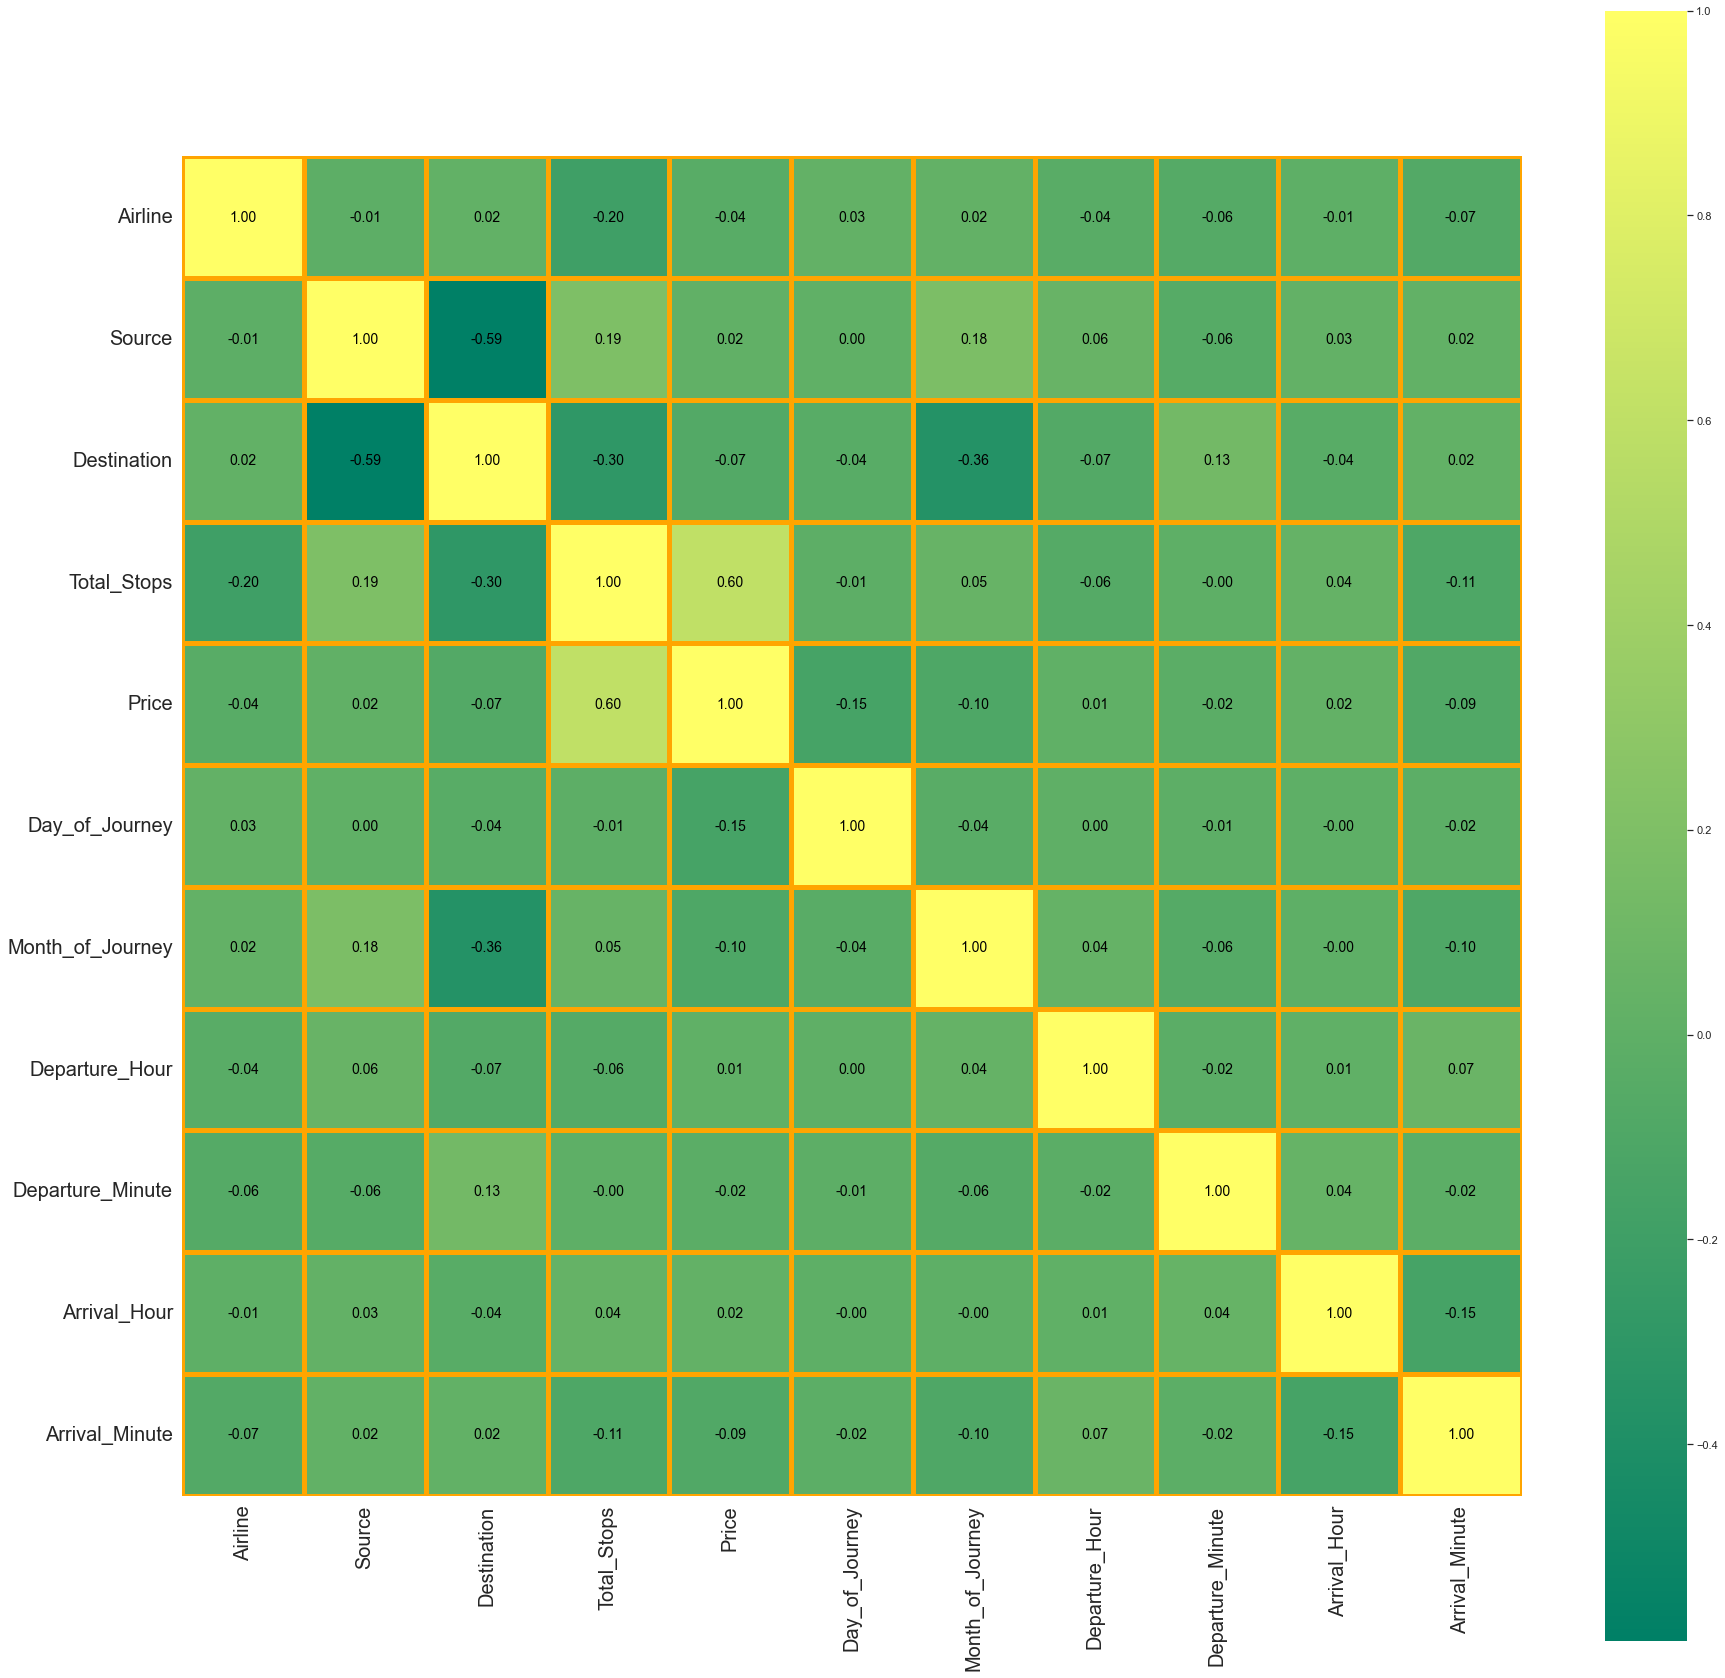

In [46]:
plt.figure(figsize=(30,30))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
sns.heatmap(df.corr(),annot=True,cmap='summer',linewidths=5,linecolor='orange',annot_kws={'size':14,'color':'black'},fmt='.2f',square=True)

### Scaling

In [47]:
df.shape

(10681, 13)

In [48]:
from sklearn.preprocessing import RobustScaler

In [49]:
roscaler=RobustScaler()

In [50]:
df[['Total_Stops','Day_of_Journey','Month_of_Journey','Departure_Hour','Departure_Minute','Arrival_Hour','Arrival_Minute','Duration_Hours','Duration_Minutes']]=roscaler.fit_transform(df[['Total_Stops','Day_of_Journey','Month_of_Journey','Departure_Hour','Departure_Minute','Arrival_Hour','Arrival_Minute','Duration_Hours','Duration_Minutes']])

## Defining Objects for Features And Target

In [51]:
features=df.drop('Price',axis=1)

In [52]:
features.head()

,Airline,Source,Destination,Total_Stops,Day_of_Journey,Month_of_Journey,Departure_Hour,Departure_Minute,Arrival_Hour,Arrival_Minute,Duration_Hours,Duration_Minutes
0,3.0,0.0,5.0,-1.0,0.800000,-0.666667,1.1,-0.142857,-1.181818,-0.6,-0.461538,0.666667
1,1.0,3.0,0.0,1.0,-0.733333,0.000000,-0.6,0.714286,-0.090909,-0.4,-0.076923,-0.166667
2,4.0,2.0,1.0,1.0,-0.200000,0.333333,-0.2,0.000000,-0.909091,0.0,0.846154,-1.000000
3,3.0,3.0,0.0,0.0,0.000000,0.000000,0.7,-0.571429,0.818182,0.2,-0.230769,-0.166667
4,3.0,0.0,5.0,0.0,-0.733333,-0.666667,0.5,0.714286,0.636364,0.4,-0.307692,0.500000


In [53]:
target=df['Price']

#### Splitting Data For Training And Testing

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
features_train,features_test,target_train,target_test=train_test_split(features,target,test_size=0.2,random_state=8)

## Trying All the Algorithms for Getting Best Accuracy

In [56]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor,AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from xgboost import XGBRFRegressor

In [57]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [58]:
models={'Linear Reg':LinearRegression(),
        'Lasso':Lasso(),
        'Ridge':Ridge(),
        'Decision Tree':DecisionTreeRegressor(),
        'Random Forest':RandomForestRegressor(),
        'Gradient Boosting':GradientBoostingRegressor(),
        'KNN':KNeighborsRegressor(),
        'SVM':SVR(),
        'AdaBoost':AdaBoostRegressor(),
        'XGBoost':XGBRFRegressor()
       }

In [59]:
for name, model in models.items():
    model1=model.fit(features_train,target_train)
    y_pred = model1.predict(features_test)
    print(f'{name} Mean squared error:  {mean_squared_error(target_test,y_pred)}') 
    print(f'{name} accuracy score: {model1.score(features_test,target_test)}\n')

Linear Reg Mean squared error:  13339568.874539975
Linear Reg accuracy score: 0.4078334366120394

Lasso Mean squared error:  13340006.349304706
Lasso accuracy score: 0.4078140163496279

Ridge Mean squared error:  13339512.41663335
Ridge accuracy score: 0.40783594287628644

Decision Tree Mean squared error:  6105435.12465866
Decision Tree accuracy score: 0.7289691616152816

Random Forest Mean squared error:  3621232.2804951565
Random Forest accuracy score: 0.8392472279322959

Gradient Boosting Mean squared error:  4777462.544111204
Gradient Boosting accuracy score: 0.7879201642070612

KNN Mean squared error:  6074628.934543752
KNN accuracy score: 0.7303367017436765

SVM Mean squared error:  22010767.212838165
SVM accuracy score: 0.022903925865575214

AdaBoost Mean squared error:  12634454.176292997
AdaBoost accuracy score: 0.43913469916274916

XGBoost Mean squared error:  5197611.155969707
XGBoost accuracy score: 0.7692690397264694



## Random Forest Gives Best Acuuracy  so Defing Model for Parameter  Tuning

In [60]:
rf=RandomForestRegressor()

In [61]:
from sklearn.model_selection import RandomizedSearchCV

In [63]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'random_state':random_state
              }

### Hyperparameter Tuning

In [64]:
rf_random=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,scoring='neg_mean_squared_error')

In [65]:
rf_random.fit(features_train,target_train)

RandomizedSearchCV(estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200],
                                        'random_state': [1, 2, 3, 4, 5, 6, 7, 8,
                                                         9, 10, 11, 12, 13, 14,
                                                         15, 16, 17, 18, 19, 20,
                                         

### Getting Best Parameters

In [66]:
rf_random.best_params_

{'random_state': 26,
 'n_estimators': 900,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 15}

### Fitting Model with Best Parameters

In [67]:
rf_new=RandomForestRegressor(n_estimators=500,random_state=35,min_samples_split=10,min_samples_leaf=1,max_features='auto',max_depth=25)

In [68]:
rf_new.fit(features_train,target_train)

RandomForestRegressor(max_depth=25, min_samples_split=10, n_estimators=500,
                      random_state=35)

In [69]:
predicted=rf_new.predict(features_test)

### Checking Accuracy

In [70]:
rf_new.score(features_test,target_test)

0.8546904105021689

In [71]:
rf_new.score(features_train,target_train)

0.9138612517818044

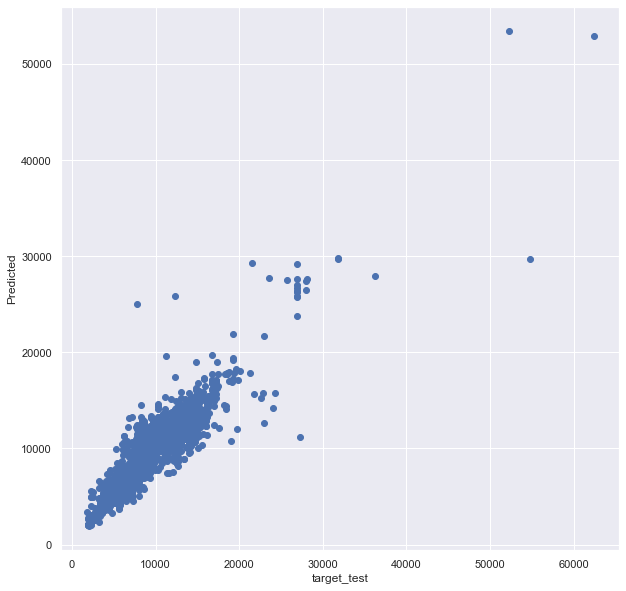

In [72]:
plt.figure(figsize=(10,10))
plt.scatter(x=target_test,y=predicted)
plt.xlabel("target_test")
plt.ylabel("Predicted")
plt.show()

## Saving Model

In [74]:
import pickle
Flight_Fare_model=open('Flight_rf.sav','wb')
pickle.dump(rf_new,Flight_Fare_model)